<a href="https://colab.research.google.com/github/Ssergeymiss/Alzheimer-s_CONV/blob/Increase_network/ALZHEIMER'S_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd

In [34]:
import os
for dirname,_,filenames in os.walk('/kaggle/Input'):
  for filenames in filenames:
     os.path.join(dirname, filename)

In [35]:
import matplotlib.pyplot as plt 
from PIL import Image

**Создадим директории для тренировочной, тестовой и валидационной выборок**

In [36]:
dir = "/content/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset"
test_dir = os.path.join("/content/faces_splited/test") 
train_dir =os.path.join("/content/faces_splited/train") 
val_dir =os.path.join("/content/faces_splited/val") 

**Загрузим датасет из соревнования kaggle**

In [37]:
! pip install kaggle
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json
!pip install opendatasets

import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/uraninjo/augmented-alzheimer-mri-dataset")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./augmented-alzheimer-mri-dataset" (use force=True to force download)


In [38]:
!pip install split-folders 
import splitfolders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
input_folder="/content/augmented-alzheimer-mri-dataset/AugmentedAlzheimerDataset"
splitfolders.ratio(input_folder, 'faces_splited', ratio = (0.65, 0.2, 0.15), seed=1337, group_prefix=None)

Copying files: 33984 files [00:19, 1774.08 files/s]


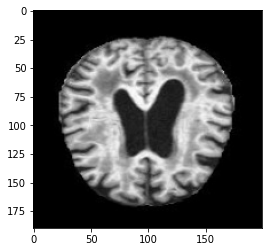

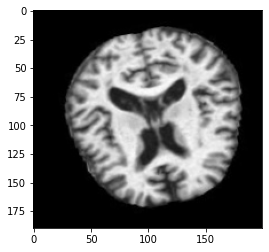

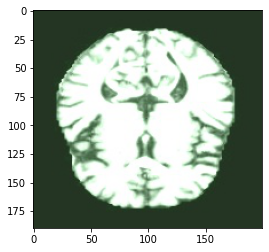

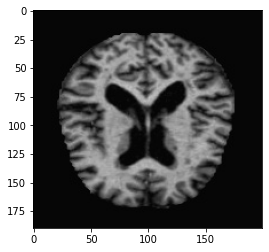

In [40]:
categ = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
for ca in categ:
    path = os.path.join(train_dir,ca)
    for img in os.listdir(path):
        img_arr =Image.open(os.path.join(path,img)) 
        arr = np.array(img_arr)
        plt.imshow(np.array(img_arr),cmap='gray')
        plt.show()
        break

<class 'numpy.ndarray'>
(190, 200, 3)


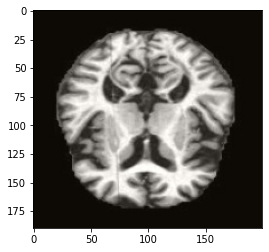

In [41]:
cart='MildDemented'
pyt=os.path.join(train_dir,cart)
img_arr=Image.open(os.path.join(path,os.listdir(path)[1005]))
img_arr=np.array(img_arr)
print(type(img_arr))
print(img_arr.shape)
plt.imshow(img_arr,cmap="gray")

In [42]:
  for ca in categ:
    path=os.path.join(dir,ca)
    class_num=categ.index  
    print(categ.index)  

<built-in method index of list object at 0x7f4cd01ebc40>
<built-in method index of list object at 0x7f4cd01ebc40>
<built-in method index of list object at 0x7f4cd01ebc40>
<built-in method index of list object at 0x7f4cd01ebc40>


In [43]:
def create_data(my_list,categ,my_dir):
  image_size=150
  for ca in categ:    
    
    path=os.path.join(my_dir,ca)
    class_num=categ.index
    
    for img in os.listdir(path):
      try:#
        
        img_arr=Image.open(os.path.join(path,img)).convert("L")
        new_image=img_arr.resize((image_size,image_size))
        new_image=np.asarray(new_image)#переводим входные данные в массив
        #arr=new_image.reshape(150,150,1)
        arr=new_image.reshape(150,150,1)
        if ca == "MildDemented":
          my_list.append([arr,0])
        if ca == "ModerateDemented":
          my_list.append([arr,1])
        if ca == "NonDemented":
          my_list.append([arr,2])
        if ca == "VeryMildDemented":
          my_list.append([arr,3])
       # print(type(class_num))   
      except Exception as e:
        e=e

train_list = []
test_list = []
val_list = []


In [ ]:
create_data(train_list,categ,train_dir)
create_data(test_list,categ,test_dir)
create_data(val_list,categ,val_dir)

**Перемешаем данные в датасетах**

In [ ]:
import random
random.shuffle(train_list, random.random)
random.shuffle(test_list, random.random)
random.shuffle(val_list, random.random)

In [ ]:
print(len(test_list),len(train_list),len(val_list),sep="\n")

5099
22089
6796


**Разметим наши данные**

In [ ]:
def split_data(X,y,my_list):
  image_size=150
  for fe,la in my_list:#Здесь мы переносим в две переменные данные из датасетов
    #fe-features,la-label
    
    X.append(fe)
    y.append(la)
    
  X=np.array(X).reshape(-1,image_size,image_size,1)

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []
X_val = []
y_val = []

In [ ]:
split_data(X_train, y_train, train_list)
split_data(X_test, y_test, test_list)
split_data(X_val, y_val, val_list)

**Переведем данные в массив NumPy для обработки нейросетью**

In [ ]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

**Перейдем к построению нейросети**

In [ ]:
!pip install keras
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras import layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras
import numpy as np
import sklearn.model_selection
from keras import layers
from keras import models 
!pip install keras_visualizer 
from keras_visualizer import visualizer 
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, GlobalMaxPooling2D
inputs=keras.Input(shape=(150,150,1))
from keras import regularizers
from keras.utils import to_categorical

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model=keras.Sequential()

In [ ]:

x = keras.layers.Conv2D(filters=180, kernel_size=3, input_shape=(150,150, 1), padding='same', activation="relu")(inputs)
x=layers.MaxPooling2D()(x)
x=layers.Dropout(0.5)(x)

x = keras.layers.Conv2D(filters=128, kernel_size=3, input_shape=(128, 128, 1), padding='same', activation="relu")(x)
x=layers.MaxPooling2D()(x)
x=layers.Dropout(0.2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.GlobalMaxPooling2D()(x)
#x=layers.Dropout(0.2)(x)
x= layers.Flatten()(x)

x = keras.layers.Dense(128, activation='tanh')(x)

x = keras.layers.Dense(64, activation='tanh')(x)#,kernel_regularizer=tf.keras.regularizers.L1(0.01),
    #activity_regularizer=tf.keras.regularizers.L2(0.01))(x)

x = keras.layers.Dense(32, activation='tanh')(x)

outputs = layers.Dense(4, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary() 



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 180)     1800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 180)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 180)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       207488    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 128)      0         
 2D)                                                         

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    ),
              metrics=['accuracy'])

**Загрузим блок TensorBoard для визуализации работы нейросети**

In [ ]:
%load_ext tensorboard
import datetime

In [ ]:
rm -rf ./logs/

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

**Загрузим обученные веса с прошлых итераций**

In [ ]:
model.load_weights("/content/weights_4.1.h5")

**Импортируем раннюю остановку, для избежания пере/недо обучения нейросети**

*Данный метод сохранит наилучшие веса нейросети*

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True)

In [ ]:
history=model.fit(X_train[9000:13000], y_train[9000:13000], epochs=150, batch_size=40, validation_data=(X_test,y_test), callbacks=[tensorboard_callback,early_stop])

Epoch 1/150
100/100 [==============================] - 39s 233ms/step - loss: 0.7392 - accuracy: 0.6655 - val_loss: 0.6052 - val_accuracy: 0.7284
Epoch 2/150
100/100 [==============================] - 22s 220ms/step - loss: 0.7114 - accuracy: 0.6800 - val_loss: 0.6499 - val_accuracy: 0.6939
Epoch 3/150
100/100 [==============================] - 22s 221ms/step - loss: 0.6751 - accuracy: 0.6862 - val_loss: 0.5768 - val_accuracy: 0.7388
Epoch 4/150
100/100 [==============================] - 22s 222ms/step - loss: 0.6423 - accuracy: 0.7100 - val_loss: 0.6215 - val_accuracy: 0.7254
Epoch 5/150
100/100 [==============================] - 22s 222ms/step - loss: 0.6561 - accuracy: 0.7042 - val_loss: 0.6136 - val_accuracy: 0.7170
Epoch 6/150
100/100 [==============================] - 20s 202ms/step - loss: 0.6283 - accuracy: 0.7157 - val_loss: 0.5761 - val_accuracy: 0.7411
Epoch 7/150
100/100 [==============================] - 22s 222ms/step - loss: 0.6110 - accuracy: 0.7250 - val_loss: 0.5750 -

**Сохраним веса нейросети**

In [ ]:
model.save_weights('weights_4.2.h5')

In [ ]:
%tensorboard --logdir logs/fit

**Предскажем метки для 4-х объектов данных**

In [ ]:
y_val[1:5]

array([3, 3, 1, 1])

In [ ]:
model.predict(np.array(X_val[1:5]))

1/1 [==============================] - 0s 413ms/step


array([[6.2219515e-02, 3.5004218e-06, 4.0703100e-01, 5.3074598e-01],
       [2.3896640e-02, 1.1476782e-04, 1.5356170e-01, 8.2242692e-01],
       [1.4610667e-04, 9.9954826e-01, 1.4212616e-05, 2.9145641e-04],
       [8.9180168e-05, 9.9981898e-01, 2.2899198e-06, 8.9546971e-05]],
      dtype=float32)

**Посмотрим результат нашей модели на данных, которые она никогда не видела**

In [ ]:
model.evaluate(X_val,y_val) 

*Мы получили точность в 78%*

In [ ]:
model_file = "top_model_2.h5"
model.save(model_file)

**Точность нейросети**

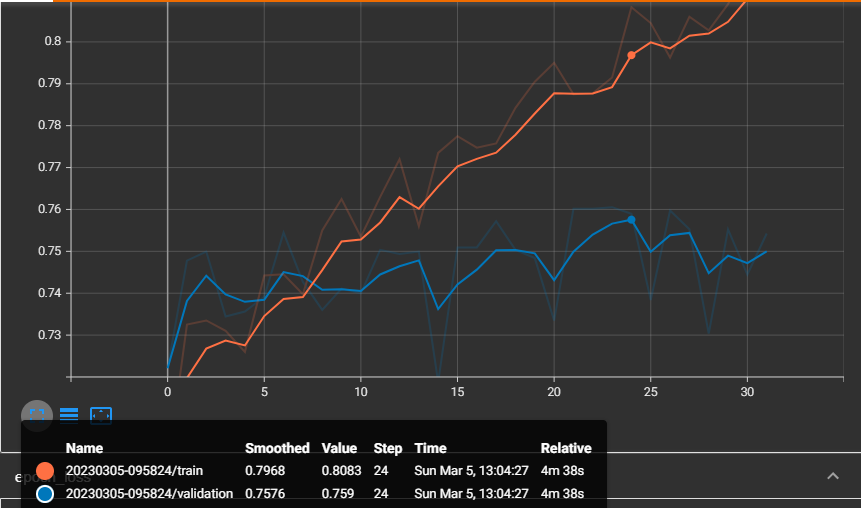

**Функция ошибки нейросети**

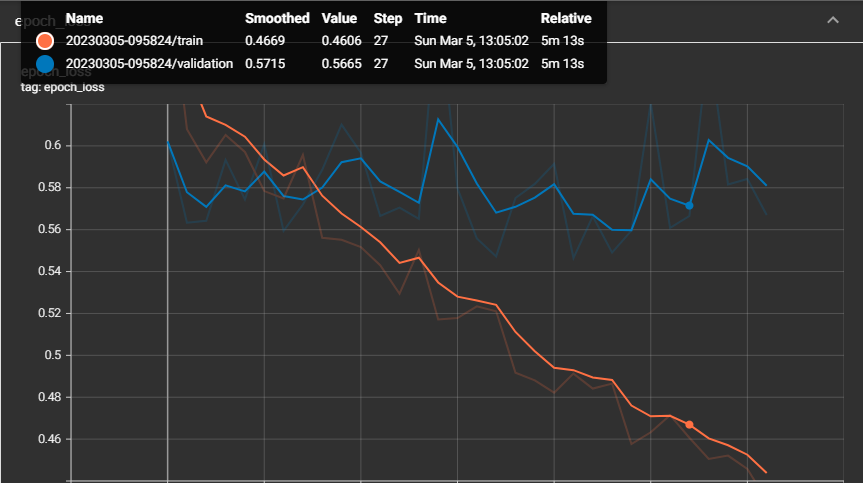

**Снизим нагрузку на GPU**

In [ ]:
!pip install numba
from numba import cuda
device = cuda.get_current_device()
device.reset()

In [ ]:
import torch

In [ ]:
torch.cuda.empty_cache()